In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="q69gCvxB8cC0DhytVepz")
project = rf.workspace("my-detection").project("wall-crack-detection-vxhsb")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.71, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to wall-crack-detection-1 in yolov8:: 100%|██████████| 766/766 [00:00<00:00, 8421.35it/s]


In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=/home/chollan/Project/web/wallcrack/wall-crack-detection-1/data.yaml epochs=100 imgsz=800 plots=True

Ultralytics YOLOv8.0.202 🚀 Python-3.9.16 torch-2.0.0+cu117 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/chollan/Project/web/wallcrack/wall-crack-detection-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

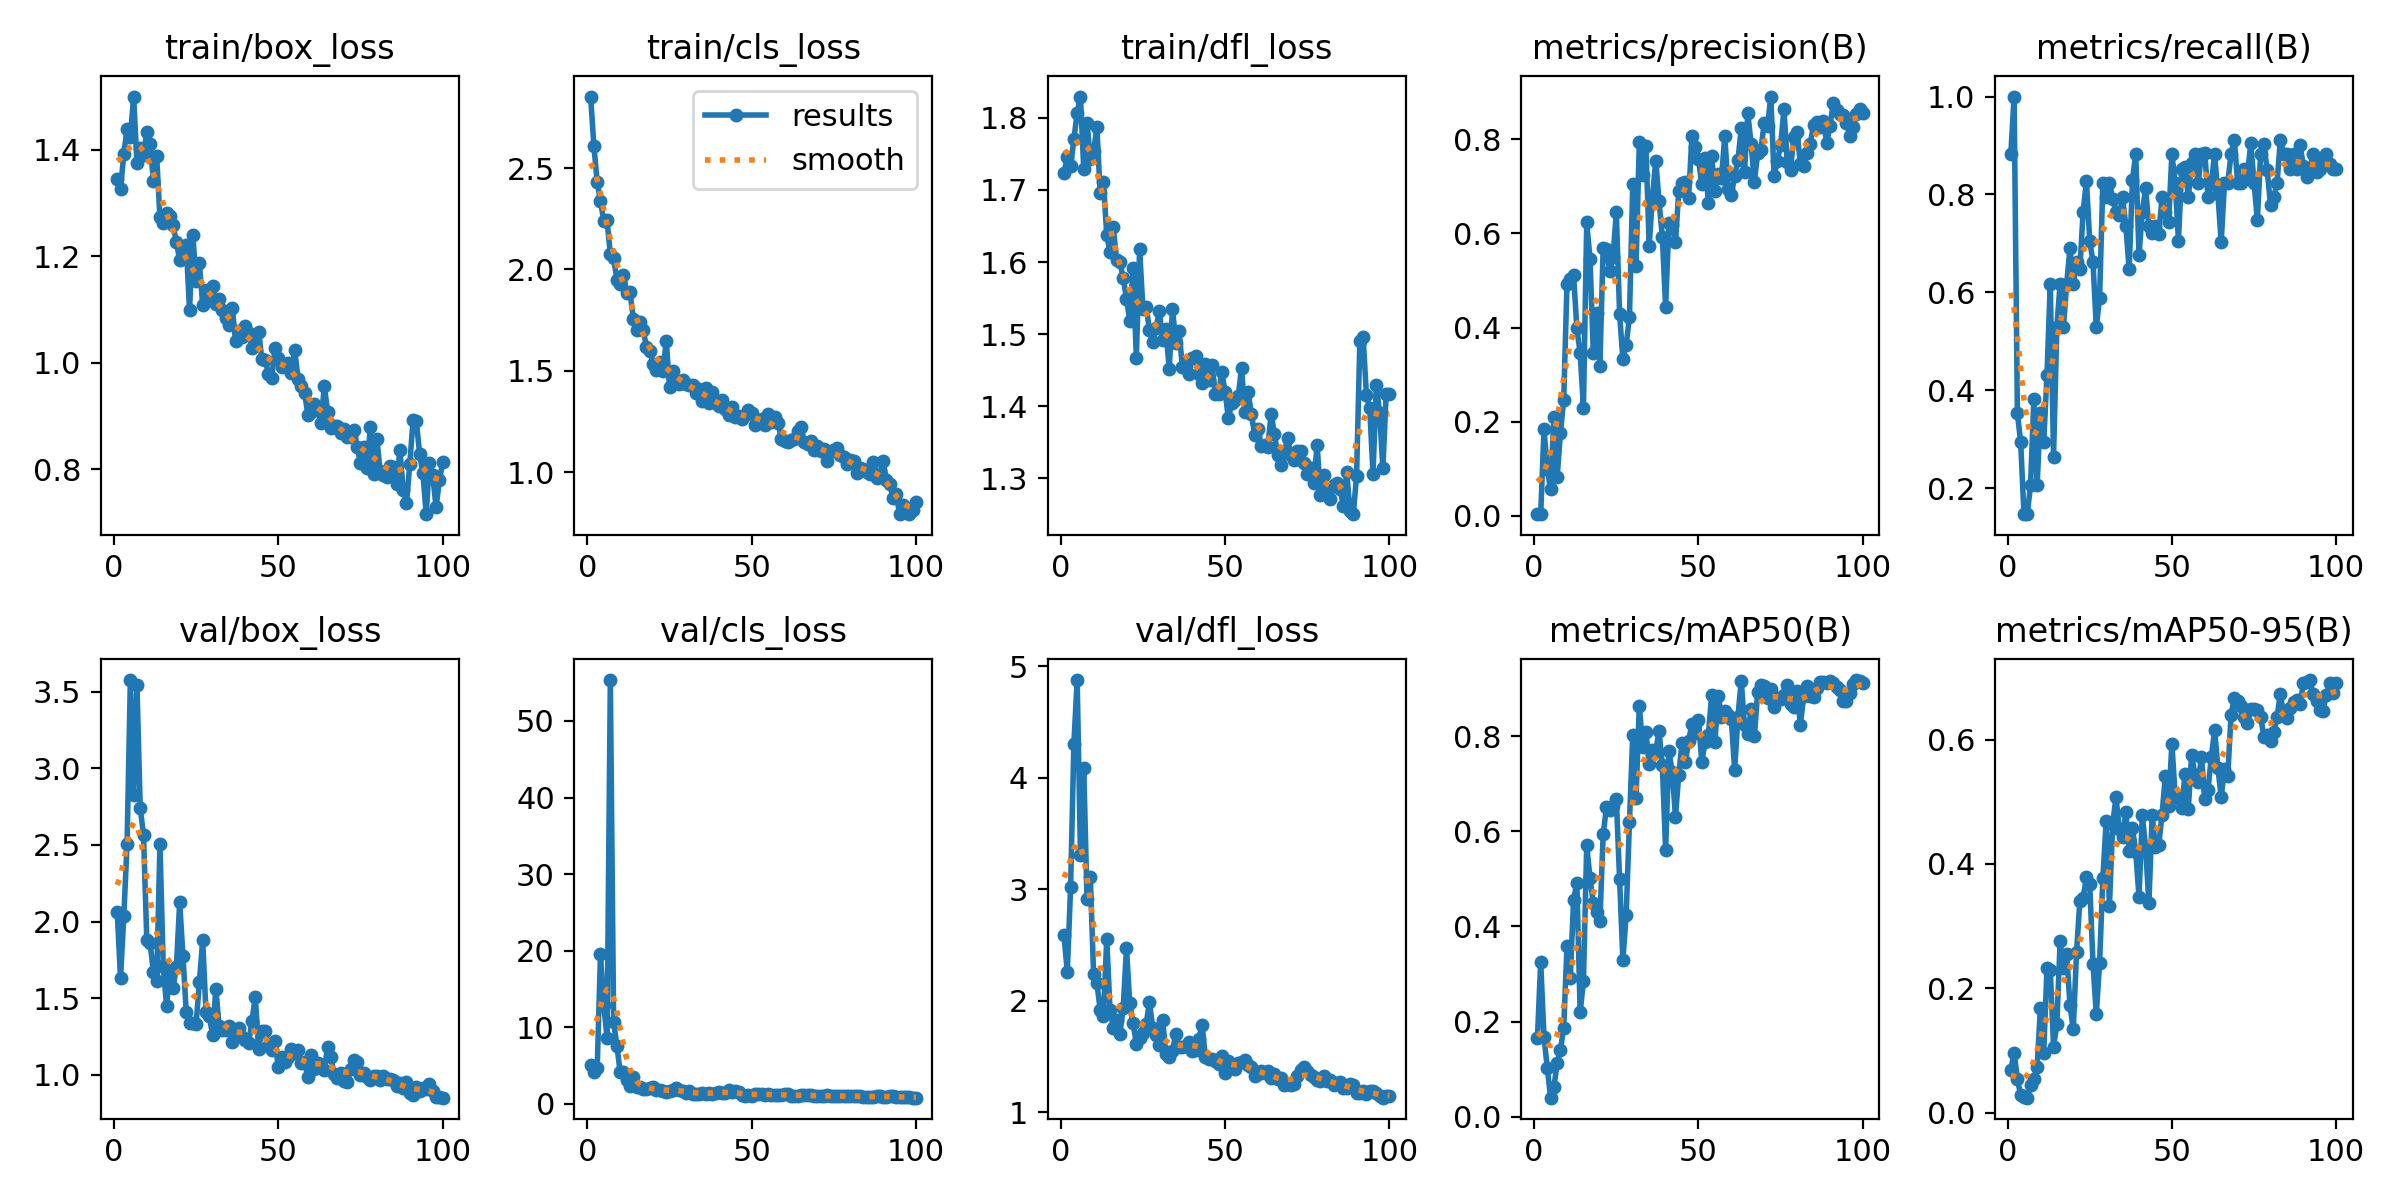

In [10]:
from IPython.display import display, Image

project_dir = "/home/chollan/Project/web/wallcrack"

Image(filename=f'{project_dir}/runs/detect/train4/results.png')

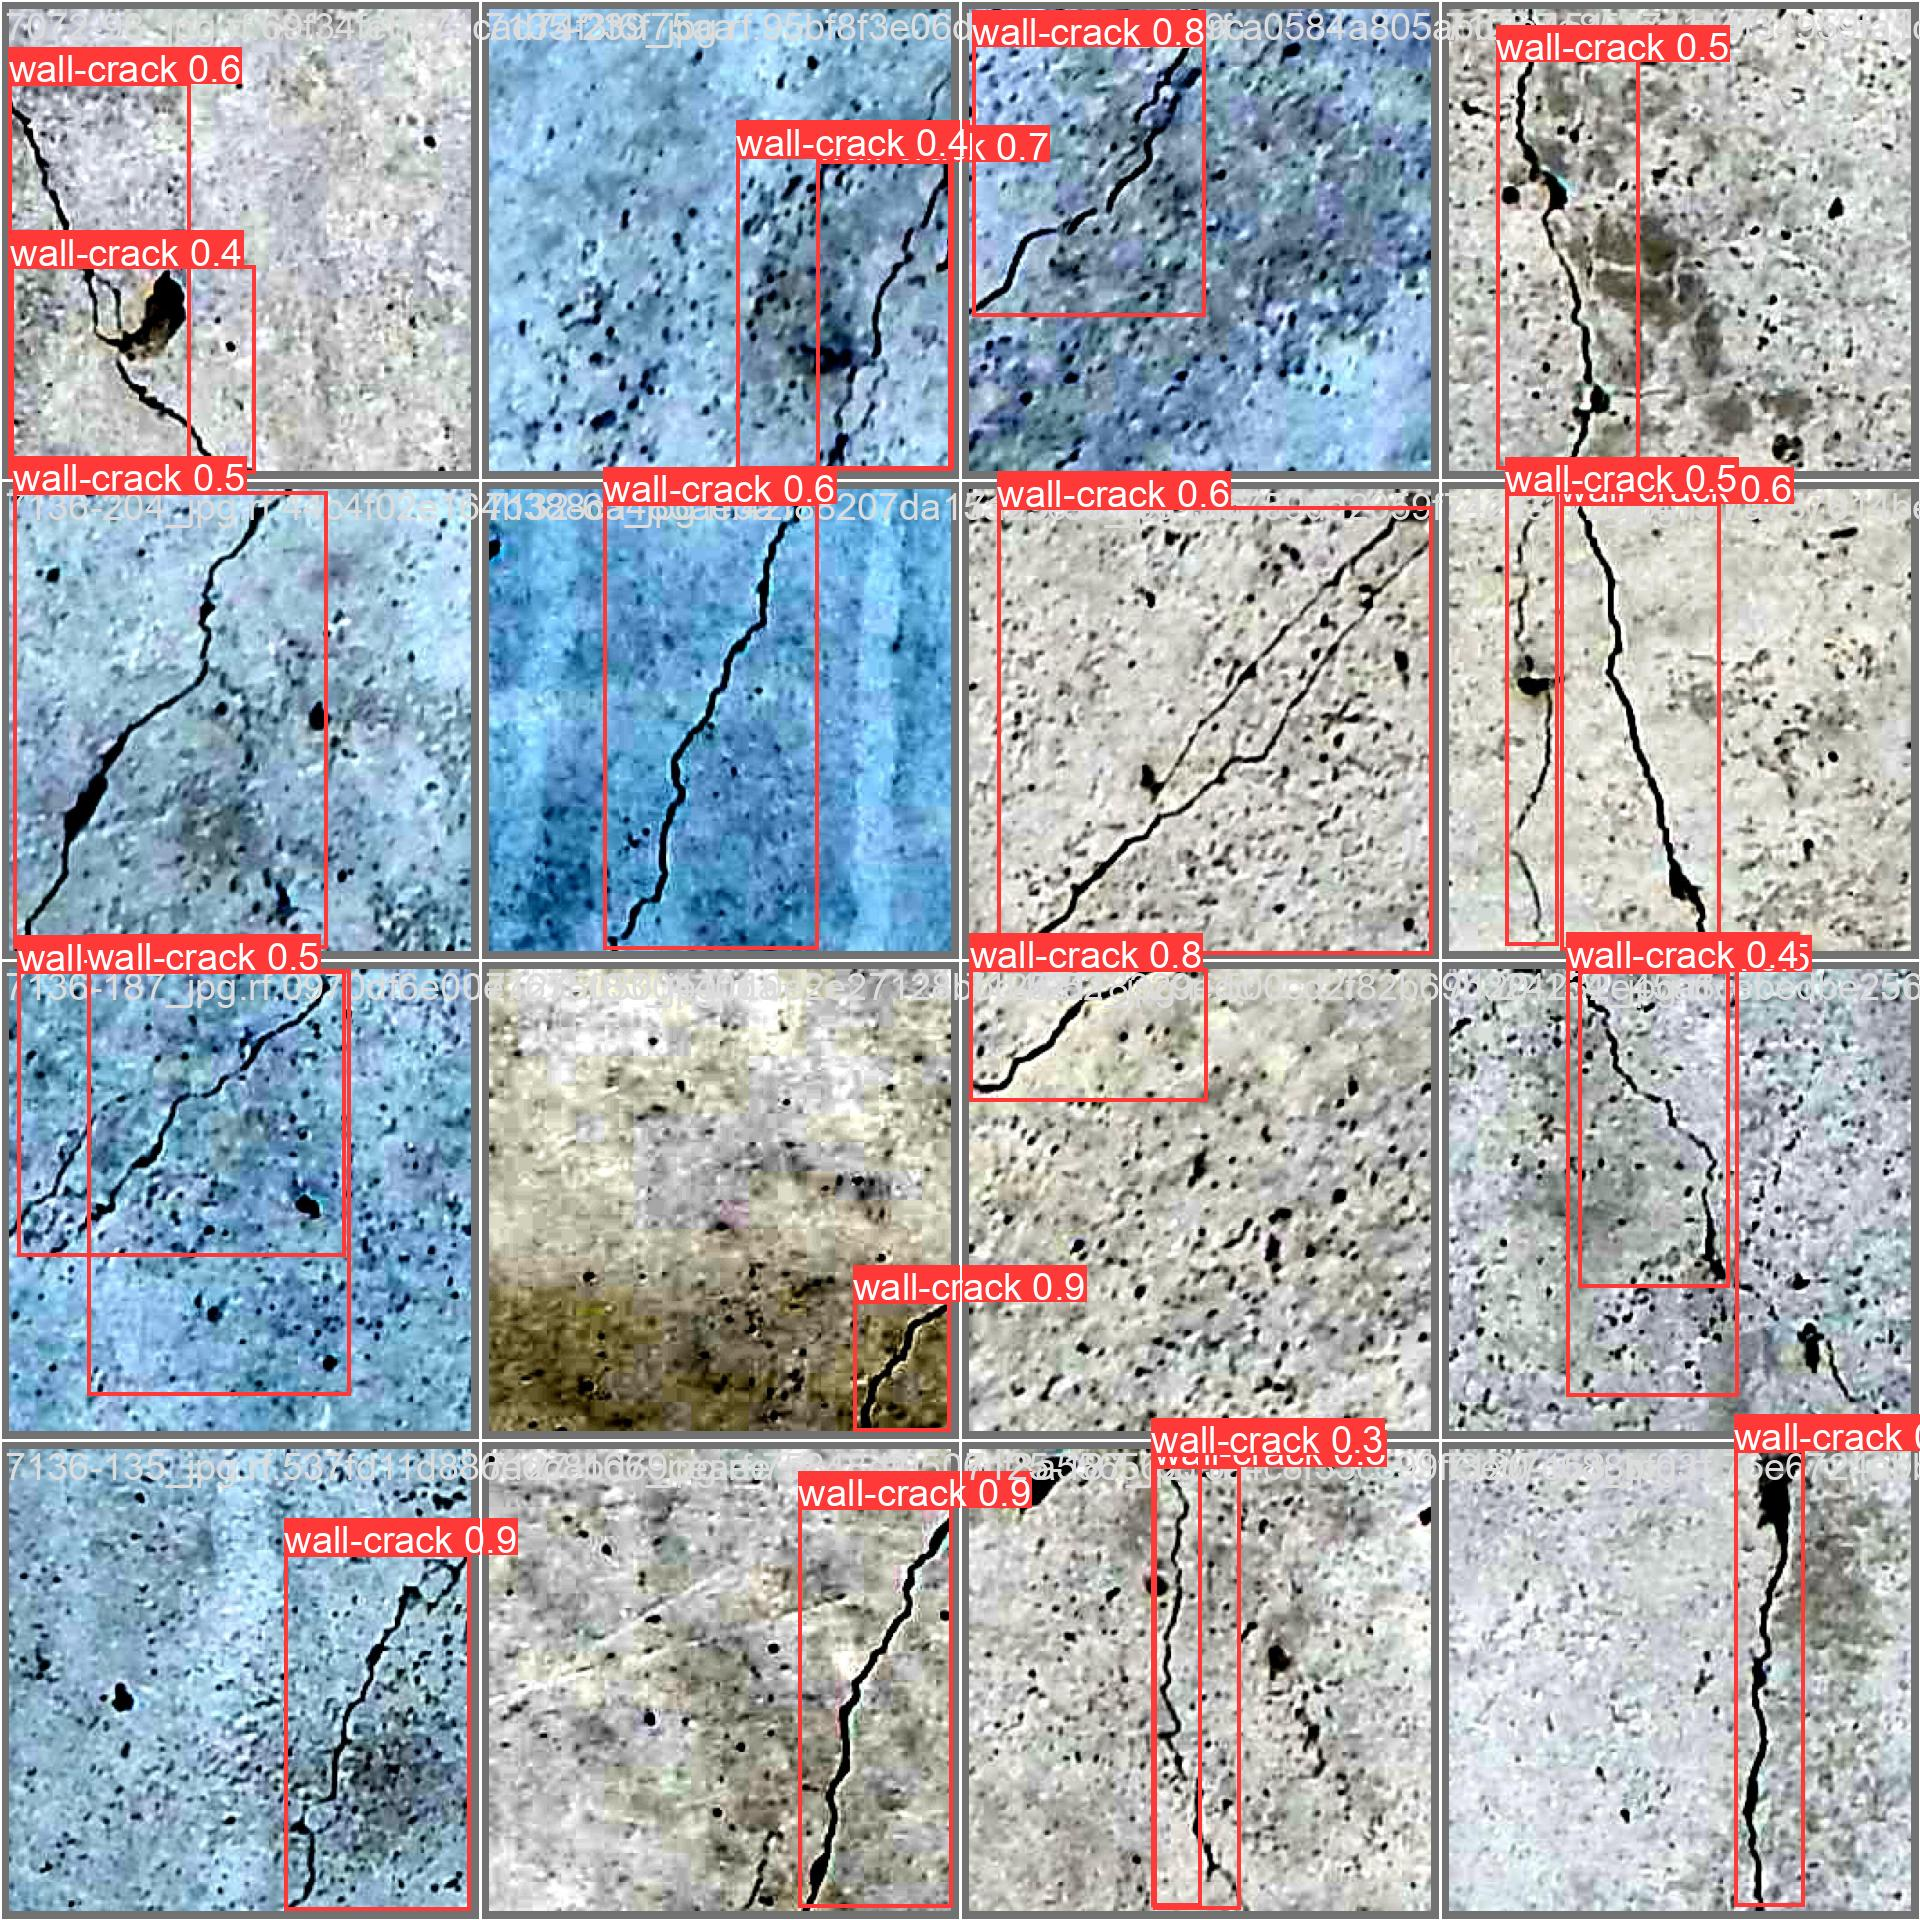

In [13]:
Image(filename=f'{project_dir}/runs/detect/train4/val_batch0_pred.jpg')

In [19]:
!yolo task=detect mode=predict model=best.pt conf=0.40 source=/home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images save=True

Ultralytics YOLOv8.0.202 🚀 Python-3.9.16 torch-2.0.0+cu117 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/15 /home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images/7072-116_jpg.rf.df2870e5518377f0c07b1e0d4880c064.jpg: 800x800 2 wall-cracks, 506.1ms
image 2/15 /home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images/7072-43_jpg.rf.8b2fce3564e2aa76458fce8ff7ff6412.jpg: 800x800 1 wall-crack, 523.4ms
image 3/15 /home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images/7091-100_jpg.rf.410a3778ff48745ed59c511b04e06bf6.jpg: 800x800 1 wall-crack, 505.1ms
image 4/15 /home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images/7117-60_jpg.rf.c23db461ab748a4a9c54bd6467661c56.jpg: 800x800 1 wall-crack, 544.6ms
image 5/15 /home/chollan/Project/web/wallcrack/wall-crack-detection-1/test/images/7119-175_jpg.rf.6ae95cdf8fa0cc4b8b9d0a94d9ea8136.jpg: 800x800 1 wall-

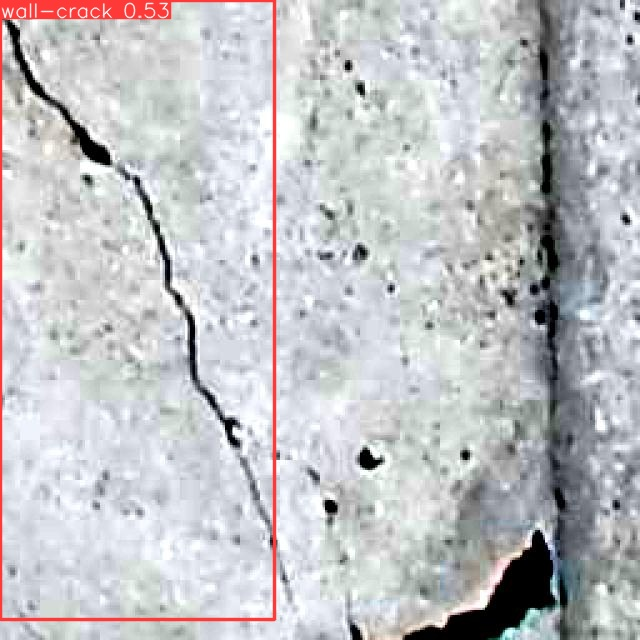

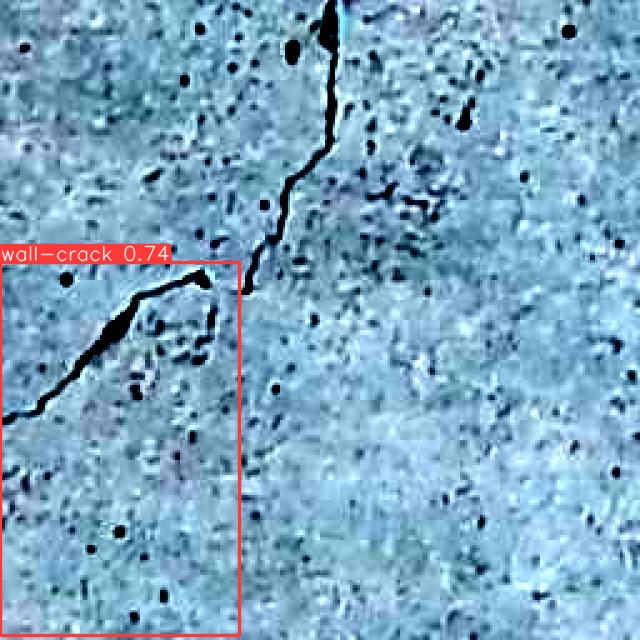

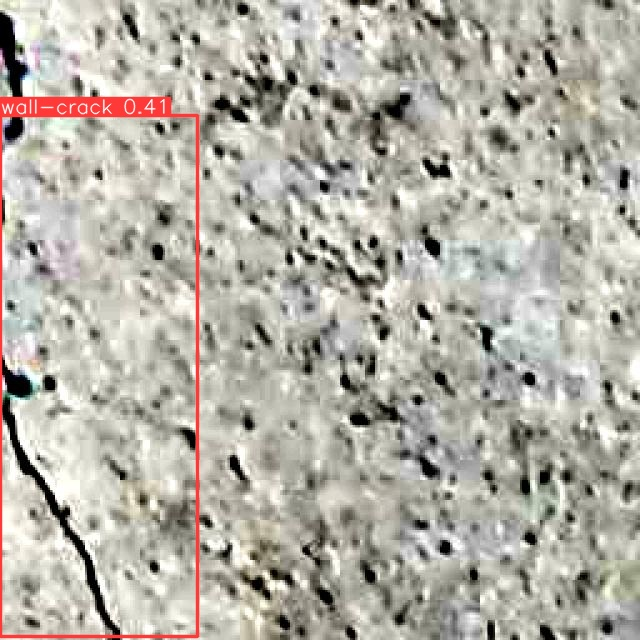

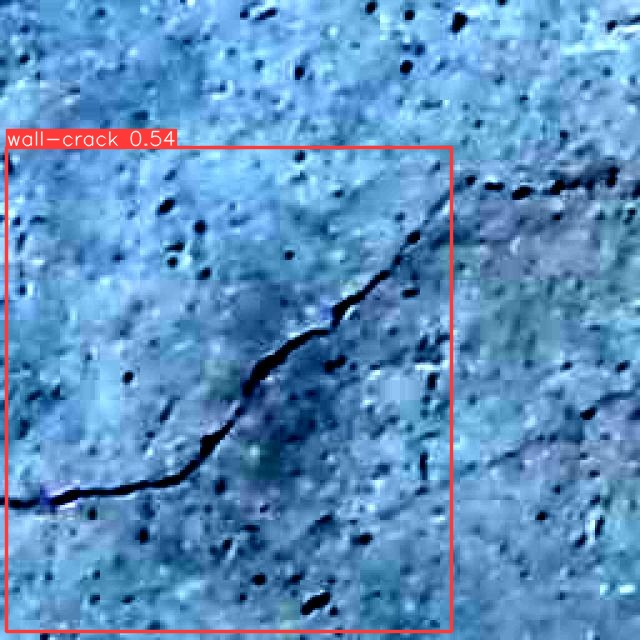

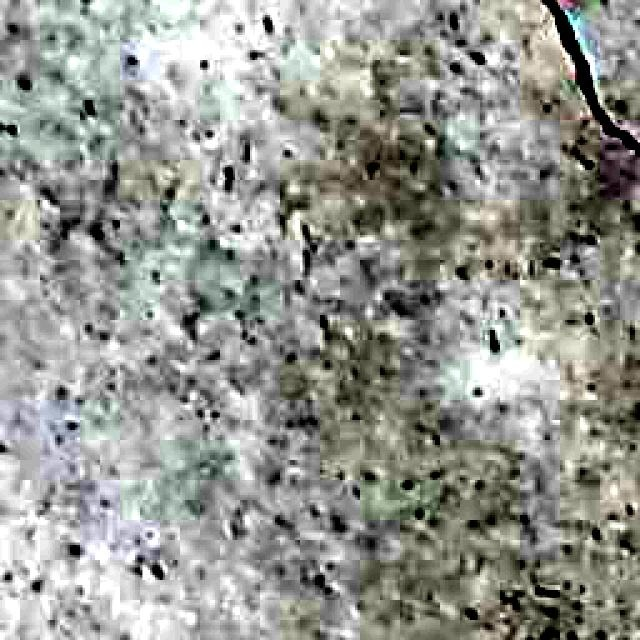

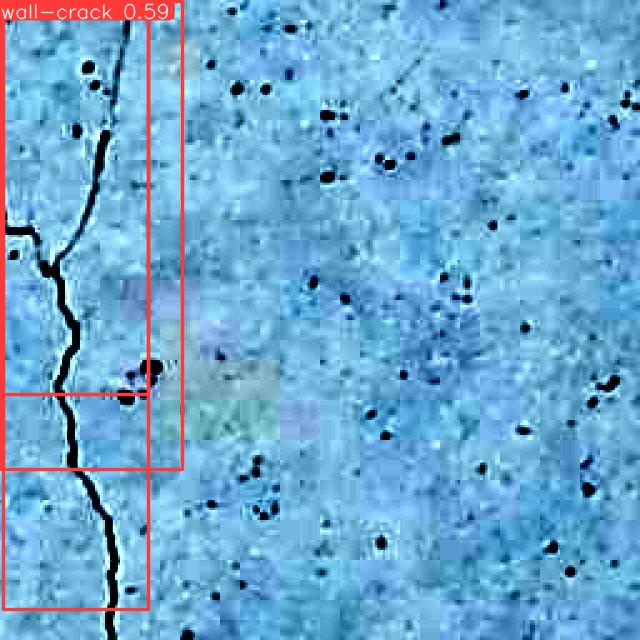

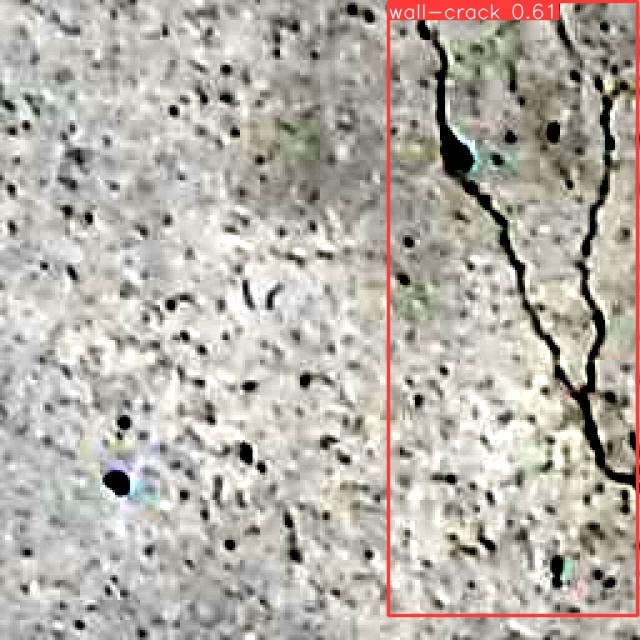

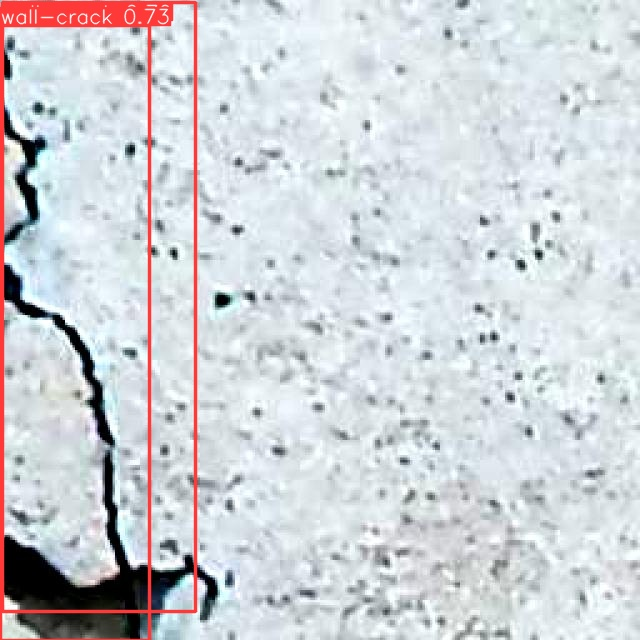

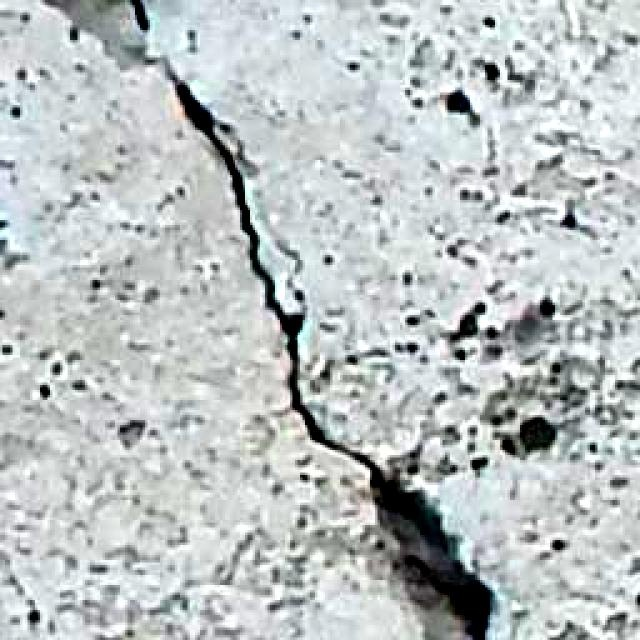

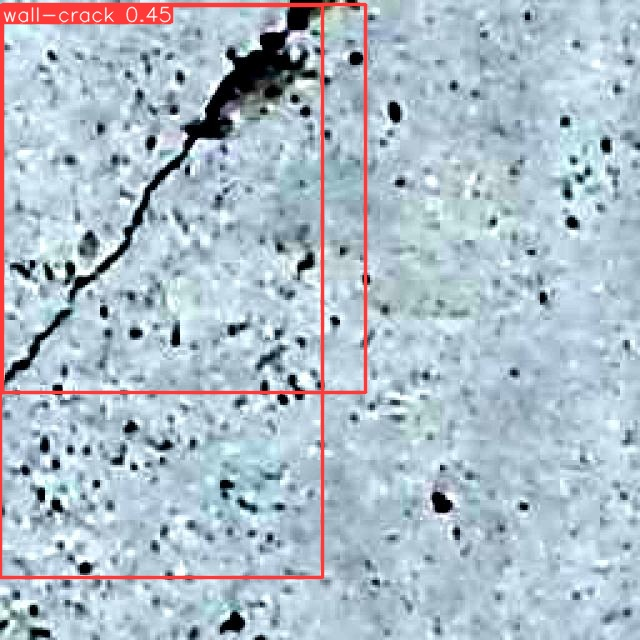

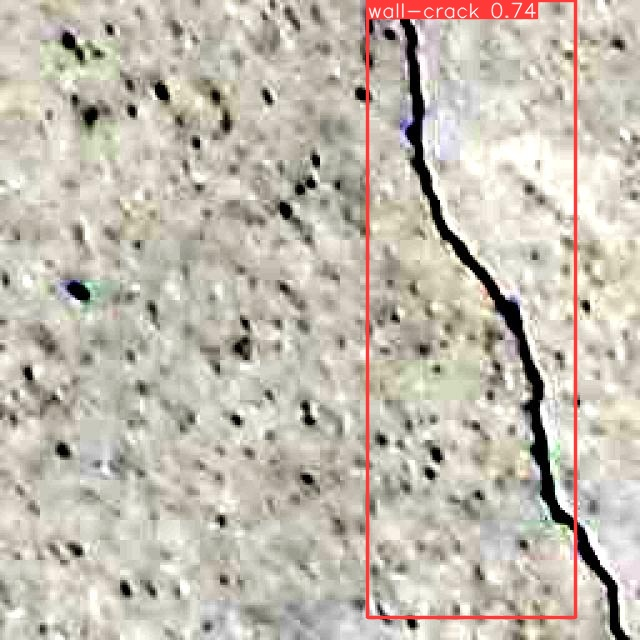

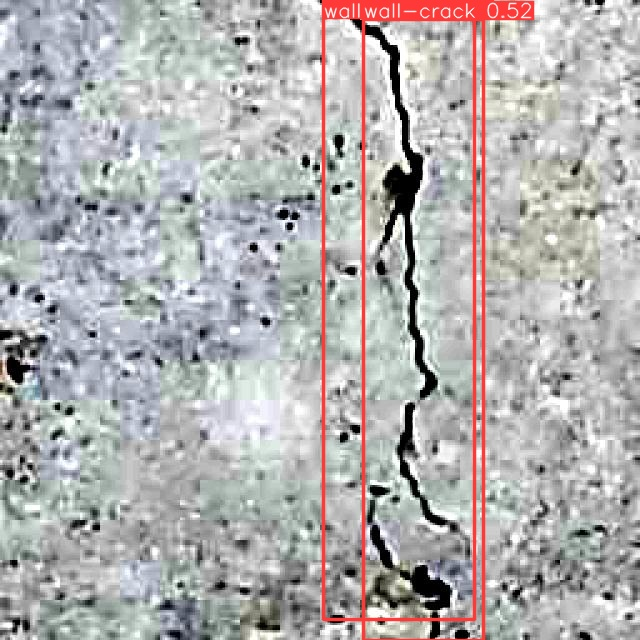

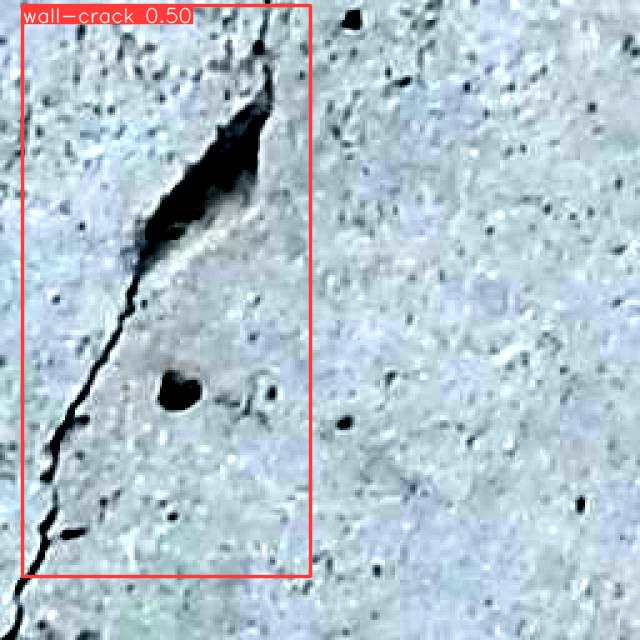

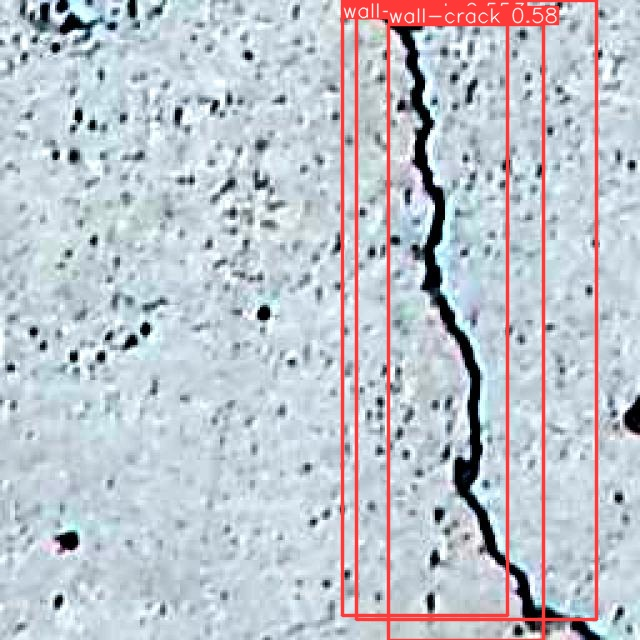

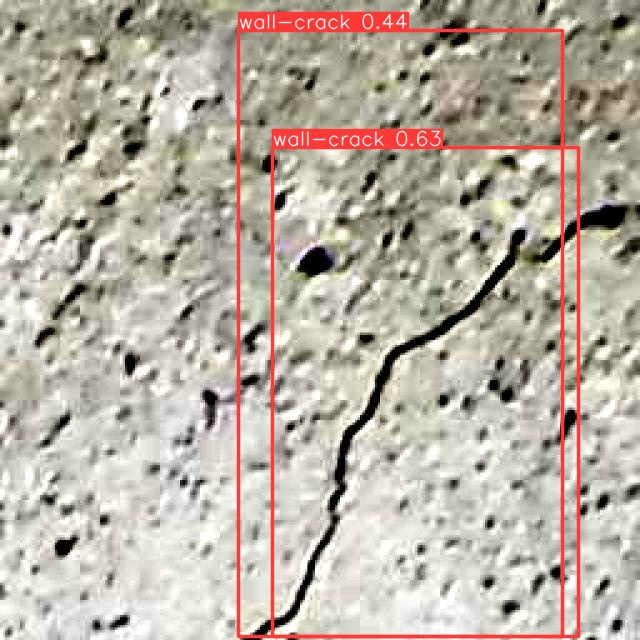

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{project_dir}/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

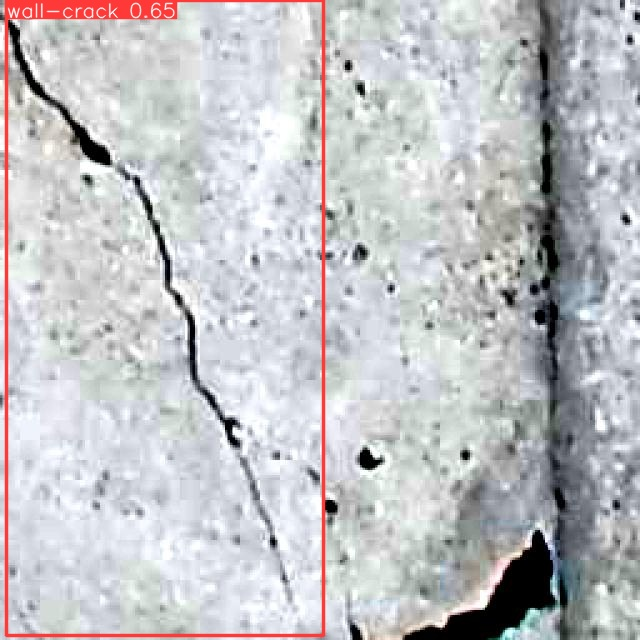

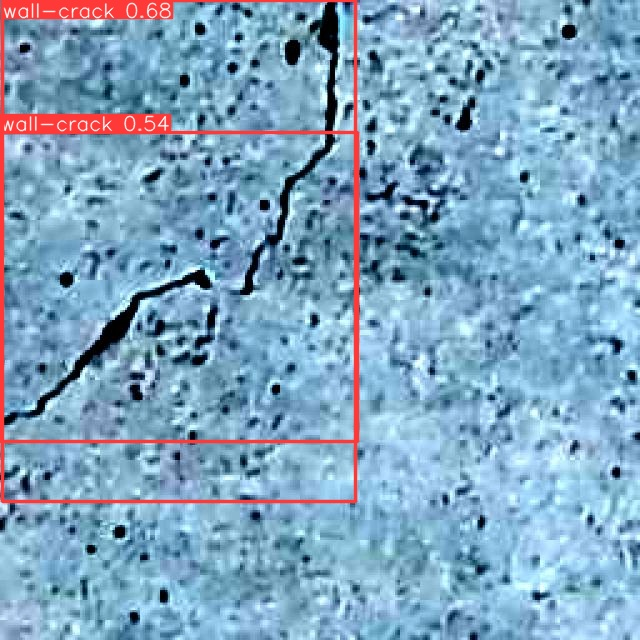

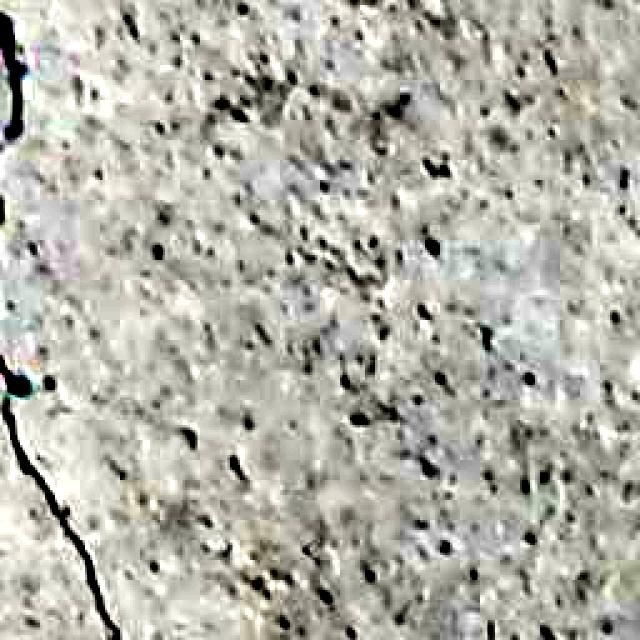

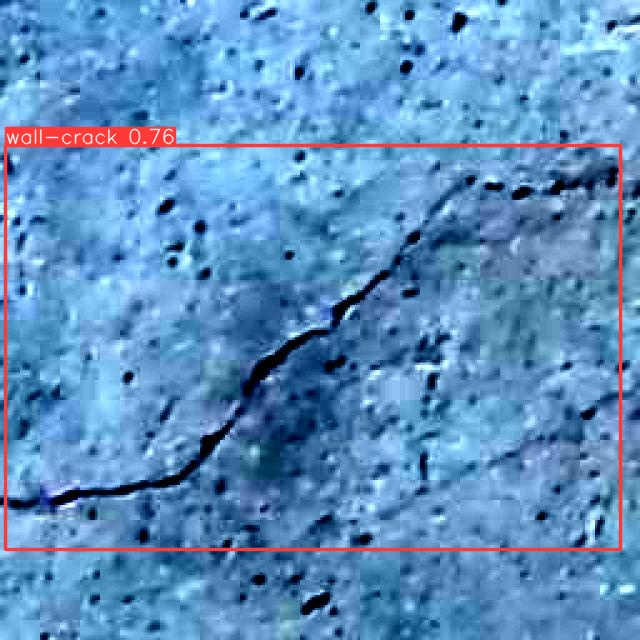

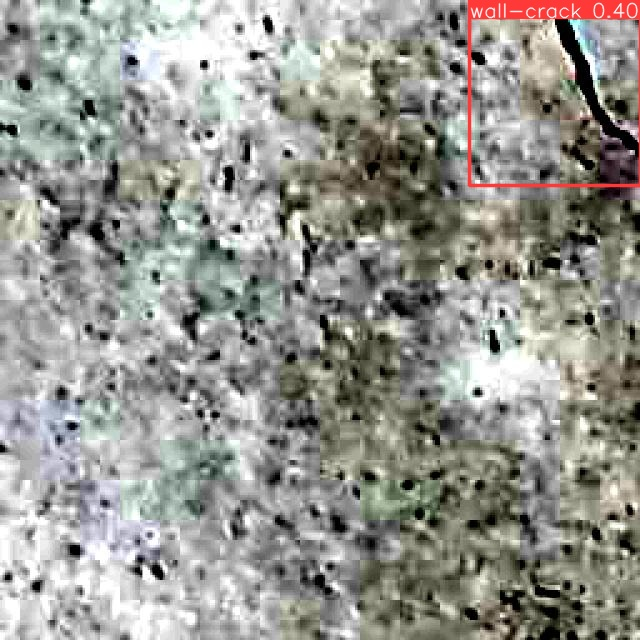

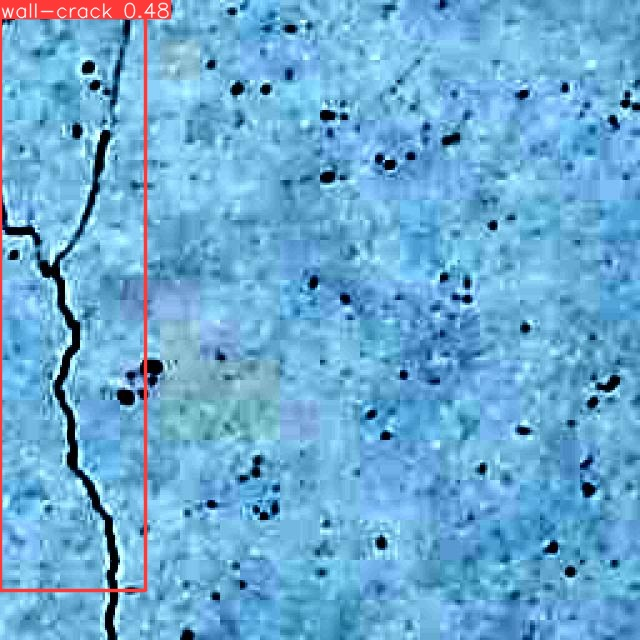

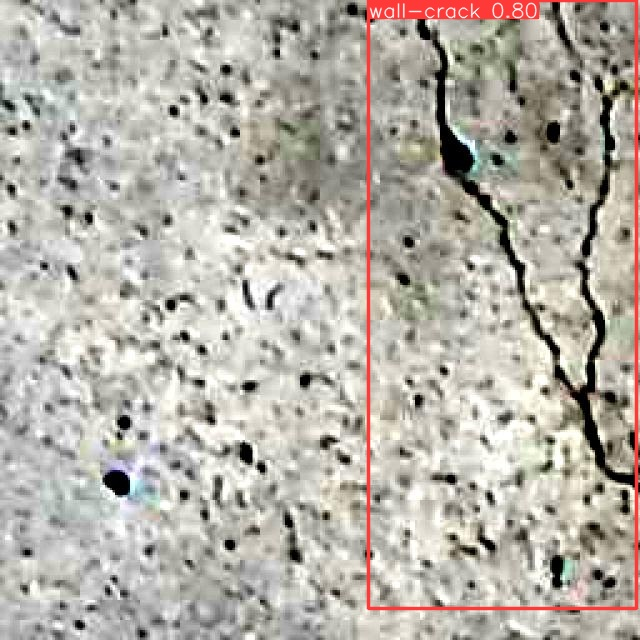

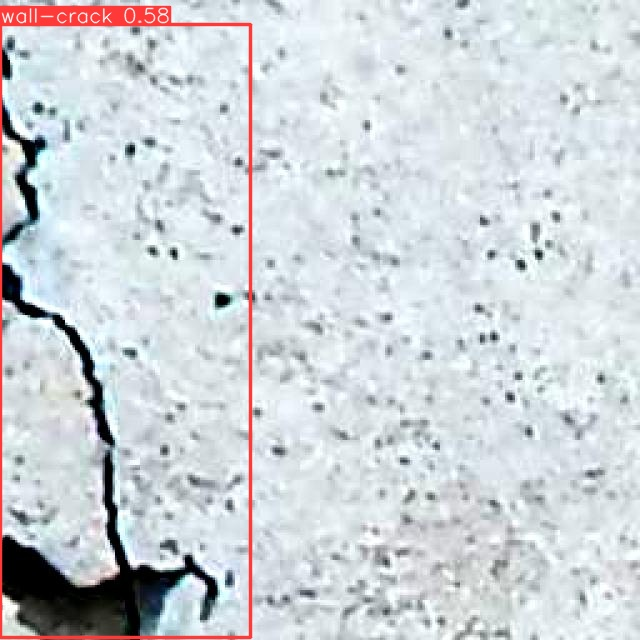

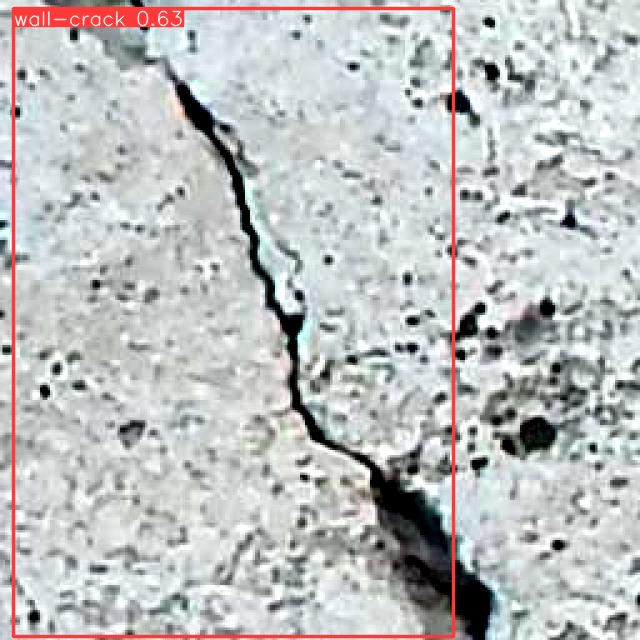

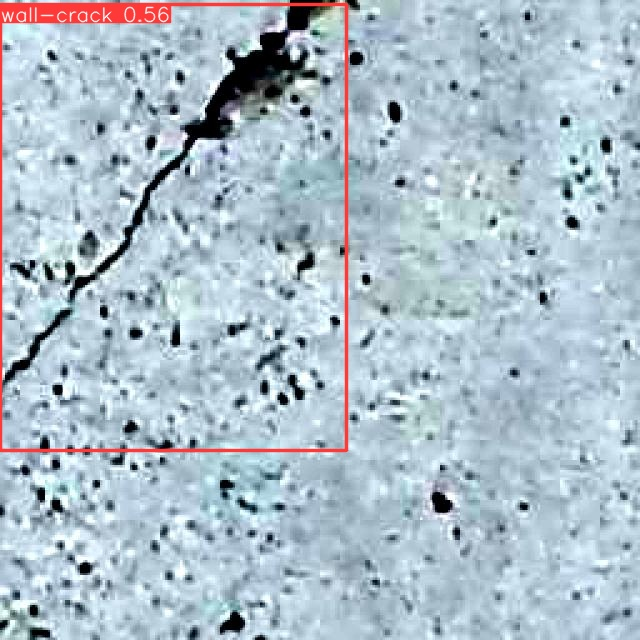

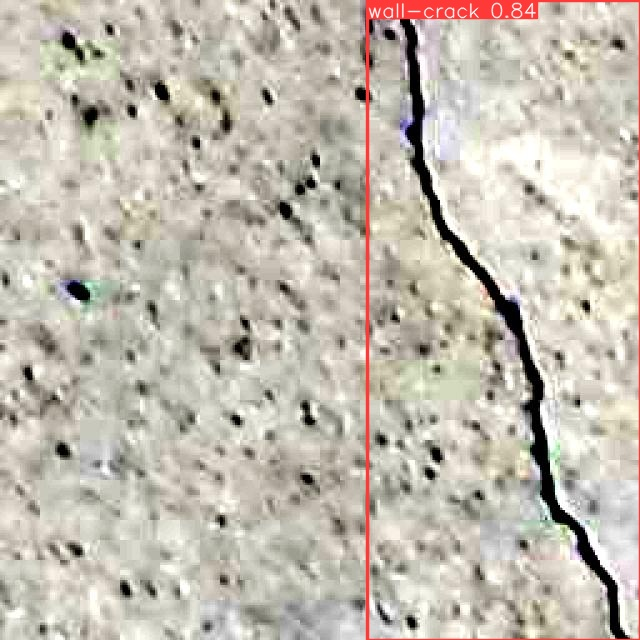

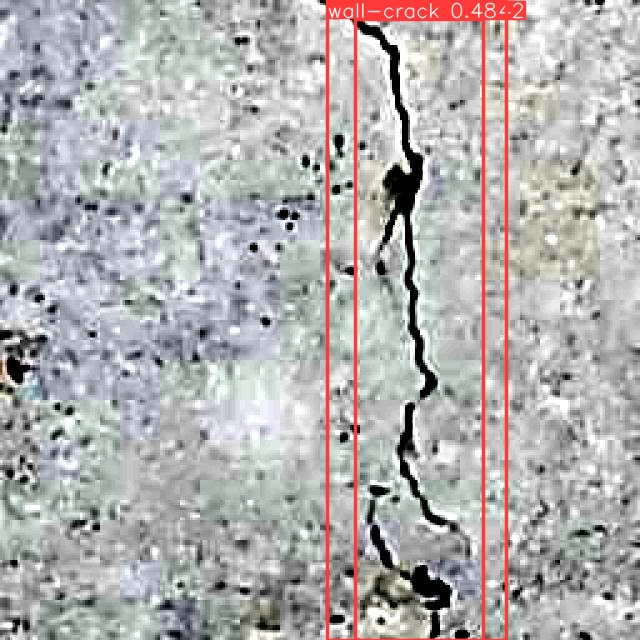

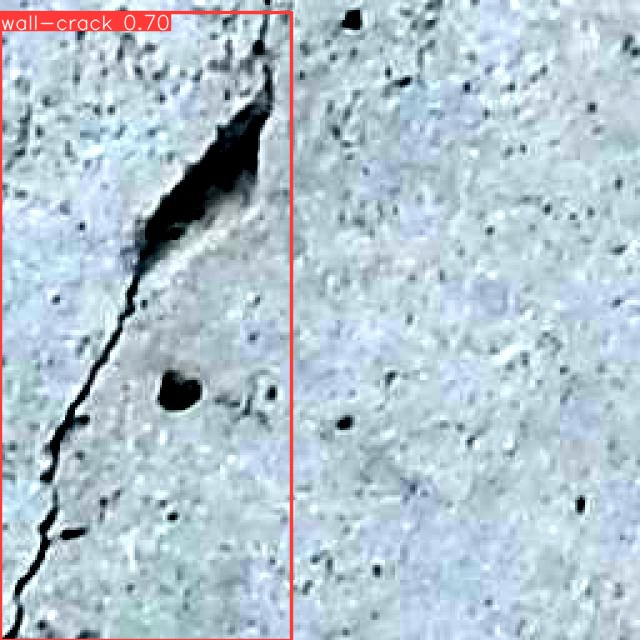

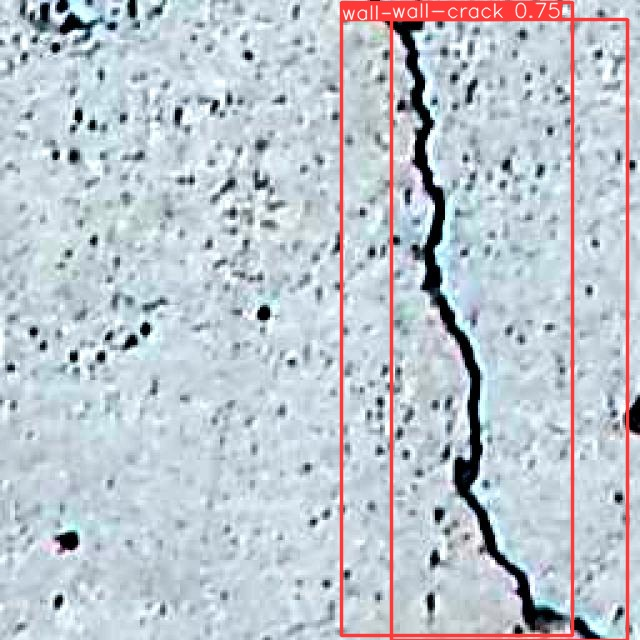

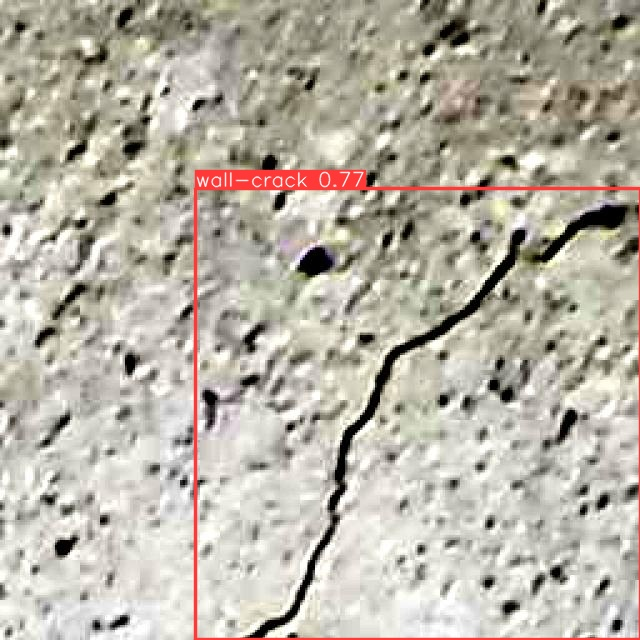

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{project_dir}/runs/detect/predict3/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [21]:
from ultralytics import YOLO

model = YOLO('best.pt')

In [22]:
results = model.predict('crack/7074-112.jpg')


image 1/1 /home/chollan/Project/web/wallcrack/crack/7074-112.jpg: 800x800 2 wall-cracks, 202.3ms
Speed: 3.0ms preprocess, 202.3ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)


In [24]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'wall-crack'}
 orig_img: array([[[169, 167, 166],
         [167, 165, 164],
         [167, 165, 164],
         ...,
         [181, 179, 178],
         [176, 174, 173],
         [171, 169, 168]],
 
        [[170, 168, 167],
         [168, 166, 165],
         [168, 166, 165],
         ...,
         [179, 177, 176],
         [175, 173, 172],
         [171, 169, 168]],
 
        [[168, 166, 165],
         [166, 164, 163],
         [165, 163, 162],
         ...,
         [176, 174, 173],
         [174, 172, 171],
         [171, 169, 168]],
 
        ...,
 
        [[181, 179, 178],
         [180, 178, 177],
         [179, 177, 176],
         ...,
         [171, 169, 168],
         [171, 169, 168],
         [170, 168, 167]],
 
        [[176, 174, 173],
         [176, 174, 173],
         [176, 174, 173],
         ...,
         [171, 169, 168],